# Projekt 6: Przewidywanie struktury drugorzędowej RNA

In [5]:
# %pip install matplotlib pandas seaborn

In [8]:
import os
import random
from collections import defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

DatasetDirectory = Path("./resources/datasets")
ModelDirectory = Path("./resources/models")
ResultsDirectory = Path("./resources/results")
FiguresDirectory = Path("./resources/figures")

In [10]:
def split_datasets(
    path: Path, train_ratio: float = 0.7, valid_ratio: float = 0.15, test_ratio: float = 0.15
) -> None:
  random.seed(42)
  files = [f"{path}/{f}" for f in os.listdir(path) if f.endswith(".bpseq")]
  random.shuffle(files)

  total_files = len(files)
  train_count = int(total_files * train_ratio)
  valid_count = int(total_files * valid_ratio)

  train_files = files[:train_count]
  valid_files = files[train_count: train_count + valid_count]
  test_files = files[train_count + valid_count:]

  with open(f"{path}-train-bpseq.lst", "w") as f:
    f.write("\n".join(train_files))
  with open(f"{path}-valid-bpseq.lst", "w") as f:
    f.write("\n".join(valid_files))
  with open(f"{path}-test-bpseq.lst", "w") as f:
    f.write("\n".join(test_files))

  with open(f"{path}-train-fa.lst", "w") as f:
    f.write("\n".join(train_files).replace(".bpseq", ".fa"))
  with open(f"{path}-valid-fa.lst", "w") as f:
    f.write("\n".join(valid_files).replace(".bpseq", ".fa"))
  with open(f"{path}-test-fa.lst", "w") as f:
    f.write("\n".join(test_files).replace(".bpseq", ".fa"))


def datasets_sanity_check() -> None:
  lst_files = [file for file in os.listdir(DatasetDirectory) if file.endswith(".lst")]

  for file in lst_files:
    file_path = DatasetDirectory / file
    with open(file_path, "r") as f:
      lines = f.readlines()
    num_lines = len(lines)

    total_files = len(os.listdir(DatasetDirectory / file.split("-")[0])) // 2
    print(f"{file:<25} has {round(num_lines / total_files * 100)}% files ({num_lines})")

In [11]:
split_datasets(DatasetDirectory / "ArchiveII")
split_datasets(DatasetDirectory / "PDB")
datasets_sanity_check()

ArchiveII-train-bpseq.lst has 70% files (2779)
ArchiveII-valid-bpseq.lst has 15% files (595)
ArchiveII-test-bpseq.lst  has 15% files (596)
ArchiveII-train-fa.lst    has 70% files (2779)
ArchiveII-valid-fa.lst    has 15% files (595)
ArchiveII-test-fa.lst     has 15% files (596)
PDB-train-bpseq.lst       has 70% files (415)
PDB-valid-bpseq.lst       has 15% files (89)
PDB-test-bpseq.lst        has 15% files (90)
PDB-train-fa.lst          has 70% files (415)
PDB-valid-fa.lst          has 15% files (89)
PDB-test-fa.lst           has 15% files (90)


## ArchiveII Dataset

In [12]:
GpuCount: int = -1
EpochCount: int = 1

In [13]:
DatasetName = "ArchiveII"
Command = f"""
mxfold2 train \
  {DatasetDirectory}/{DatasetName}-train-bpseq.lst \
  --param {ModelDirectory}/{DatasetName}-model.pth \
  --save-config {ModelDirectory}/{DatasetName}-model.conf \
  --gpu {GpuCount} \
  --epoch {EpochCount}
"""
!{Command}

  1%|▎                  | 39/2779 [00:04<05:33,  8.23it/s, train_loss=1.373e-01]
Traceback (most recent call last):
  File "/home/teba_dzdancewicz/PycharmProjects/2024-siwb/.venv/bin/mxfold2", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/home/teba_dzdancewicz/PycharmProjects/2024-siwb/.venv/lib64/python3.11/site-packages/mxfold2/__main__.py", line 33, in main
    args.func(args, conf)
  File "/home/teba_dzdancewicz/PycharmProjects/2024-siwb/.venv/lib64/python3.11/site-packages/mxfold2/train.py", line 356, in <lambda>
    subparser.set_defaults(func = lambda args, conf: Train().run(args, conf))
                                                     ^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/teba_dzdancewicz/PycharmProjects/2024-siwb/.venv/lib64/python3.11/site-packages/mxfold2/train.py", line 249, in run
    self.train(epoch)
  File "/home/teba_dzdancewicz/PycharmProjects/2024-siwb/.venv/lib64/python3.11/site-packages/mxfold2/train.py", line 48, in train
    loss = tor

In [11]:
DatasetName = "ArchiveII"
Command = f"""
mxfold2 predict \
  @./{ModelDirectory}/{DatasetName}-model.conf \
  {DatasetDirectory}/{DatasetName}-test-bpseq.lst \
  --bpseq {ResultsDirectory}/{DatasetName} \
  --result {ResultsDirectory} / {DatasetName}-results.csv \
  --gpu {GpuCount}

"""
!{Command}

fish: Unknown command: mxfold2
fish: 
mxfold2 predict @./{MODELS_DIR}/{DATASET_NAME}-model.conf {DATASET_DIR}/{DATASET_NAME}-test-bpseq.lst      --bpseq {ResultsDirectory} / {DatasetName} - -result {ResultsDirectory} / {DatasetName} - results.csv                                                           - -gpu {GpuCount}
^~~~~~^


## PDB Dataset

In [20]:
DatasetName = "PDB"
Command = f"""
mxfold2 train \
  {DatasetDirectory}/{DatasetName}-train-bpseq.lst \
  --param {ModelDirectory}/{DatasetName}-model.pth \
  --save-config {ModelDirectory}/{DatasetName}-model.conf \
  --gpu {GpuCount} \
  --epoch {EpochCount}
"""
!{Command}

fish: Unknown command: mxfold2
fish: 
mxfold2 train   resources/datasets/PDB-train-bpseq.lst   --param resources/models/PDB-model.pth   --save-config resources/models/PDB-model.conf   --gpu -1   --epoch 1
^~~~~~^


In [13]:
DatasetName = "PDB"
Command = f"""
mxfold2 predict \
  @./{ModelDirectory}/{DatasetName}-model.conf \
  {DatasetDirectory}/{DatasetName}-test-bpseq.lst \
  --bpseq {ResultsDirectory}/{DatasetName} \
  --result {ResultsDirectory} / {DatasetName}-results.csv \
  --gpu {GpuCount}
"""

!{Command}

fish: Unknown command: mxfold2
fish: 
mxfold2 predict @./{MODELS_DIR}/{DATASET_NAME}-model.conf {DATASET_DIR}/{DATASET_NAME}-test-bpseq.lst      --bpseq {ResultsDirectory} / {DatasetName} - -result {ResultsDirectory} / {DatasetName} - results.csv                                                           - -gpu {GpuCount}
^~~~~~^


## Transfer Learning (ArchiveII -> PDB)

In [14]:
DatasetName = "PDB"
Command = f"""
mxfold2 train \
  @./{ModelDirectory}/ArchiveII-model.conf \
  {DatasetDirectory}/{DatasetName}-train-bpseq.lst \
  --init-param {ModelDirectory}/ArchiveII-model.pth \
  --param {ModelDirectory}/TransferLearning-model.pth \
  --save-config {ModelDirectory}/TransferLearning-model.conf \
  --gpu {GpuCount} \
  --epoch {EpochCount}
"""


fish: Unknown command: mxfold2
fish: 
mxfold2 train @./{MODELS_DIR}/ArchiveII-model.conf {DATASET_DIR}/{DATASET_NAME}-train-bpseq.lst --init-param {MODELS_DIR}/ArchiveII-model.pth      --param {ModelDirectory} / TransferLearning - model.pth - -save - config {ModelDirectory} / TransferLearning - model.conf                                                                               - -gpu {GpuCount} - -epoch {EpochCount}
^~~~~~^


In [15]:
DatasetName = "PDB"
Command = f"""
mxfold2 predict \
  @./{ModelDirectory}/TransferLearning-model.conf \
  {DatasetDirectory}/{DatasetName}-test-bpseq.lst \
  --bpseq {ResultsDirectory}/TransferLearning \
  --result {ResultsDirectory}/TransferLearning-results.csv \
  --gpu {GpuCount}
"""
!{Command}

fish: Unknown command: mxfold2
fish: 
mxfold2 predict @./resources/models/TransferLearning-model.conf {DATASET_DIR}/{DATASET_NAME}-test-bpseq.lst      --bpseq {ResultsDirectory} / TransferLearning - -result {ResultsDirectory} / TransferLearning - results.csv                                                              - -gpu {GpuCount}
^~~~~~^


## Results

In [16]:
columns: list[str] = [
  "filename",
  "sequence_length",
  "elapsed_time",
  "sc",
  "tp",
  "tn",
  "fp",
  "fn",
  "sen",
  "ppv",
  "fval",
  "mcc",
]

results = pd.read_csv(ResultsDirectory / "ArchiveII-results.csv", header=None, names=columns)
results.head()

,filename,sequence_length,elapsed_time,sc,tp,tn,fp,fn,sen,ppv,fval,mcc
0,resources/datasets/ArchiveII/tRNA_tdbR00000133...,74,0.002692,21.262447,16,2670,9,6,0.727273,0.640000,0.680851,0.679471
1,resources/datasets/ArchiveII/tRNA_tdbR00000184...,76,0.001992,10.454329,15,2830,0,5,0.750000,1.000000,0.857143,0.865261
2,resources/datasets/ArchiveII/RNaseP_C.trachoma...,408,0.166454,87.740036,84,82868,29,47,0.641221,0.743363,0.688525,0.689954
3,resources/datasets/ArchiveII/5s_Graphiola-phoe...,118,0.007524,31.200481,34,6866,2,1,0.971429,0.944444,0.957746,0.957624
4,resources/datasets/ArchiveII/srp_Clos.acet._AE...,262,0.064446,63.901093,76,34095,7,13,0.853933,0.915663,0.883721,0.883969


In [17]:
def calculate_metrics(results: pd.DataFrame) -> pd.DataFrame:
  """Calculate the metrics for the given results: INF, PPV, TPR, TNR."""
  tp_sum, tn_sum, fp_sum, fn_sum = results[["tp", "tn", "fp", "fn"]].sum()
  ppv = tp_sum / (tp_sum + fp_sum)
  tpr = tp_sum / (tp_sum + fn_sum)
  inf = (ppv * tpr) ** 0.5
  tnr = tn_sum / (tn_sum + fp_sum)
  return inf, ppv, tpr, tnr


def plot_metrics(datasets: tuple[str]) -> None:
  """Plot the metrics for the given results."""
  metrics = defaultdict(dict)
  for dataset in datasets:
    df = pd.read_csv(ResultsDirectory / f"{dataset}-results.csv", header=None, names=columns)
    inf, ppv, tpr, tnr = calculate_metrics(df)
    metrics["inf"].update({dataset: inf})
    metrics["ppv"].update({dataset: ppv})
    metrics["tpr"].update({dataset: tpr})
    metrics["tnr"].update({dataset: tnr})

  colors = sns.color_palette("magma", 3)
  fig, axs = plt.subplots(2, 2, figsize=(12, 8), tight_layout=True)
  ax1, ax2, ax3, ax4 = axs.flatten()

  ax1.set_title("INF")
  ax1.bar(metrics["inf"].keys(), metrics["inf"].values(), color=colors, label="INF")
  ax1.grid(axis="y", linestyle="--", alpha=0.25)
  ax1.set_xlabel("dataset")
  ax1.set_ylabel("score")

  ax2.set_title("PPV")
  ax2.bar(metrics["ppv"].keys(), metrics["ppv"].values(), color=colors, label="PPV")
  ax2.grid(axis="y", linestyle="--", alpha=0.25)
  ax2.set_xlabel("dataset")
  ax2.set_ylabel("score")

  ax3.set_title("TPR")
  ax3.bar(metrics["tpr"].keys(), metrics["tpr"].values(), color=colors, label="TPR")
  ax3.grid(axis="y", linestyle="--", alpha=0.25)
  ax3.set_xlabel("dataset")
  ax3.set_ylabel("score")

  ax4.set_title("TNR")
  ax4.bar(metrics["tnr"].keys(), metrics["tnr"].values(), color=colors, label="TNR")
  ax4.grid(axis="y", linestyle="--", alpha=0.25)
  ax4.set_xlabel("dataset")
  ax4.set_ylabel("score")

  fig.savefig(FiguresDirectory / "results.png")

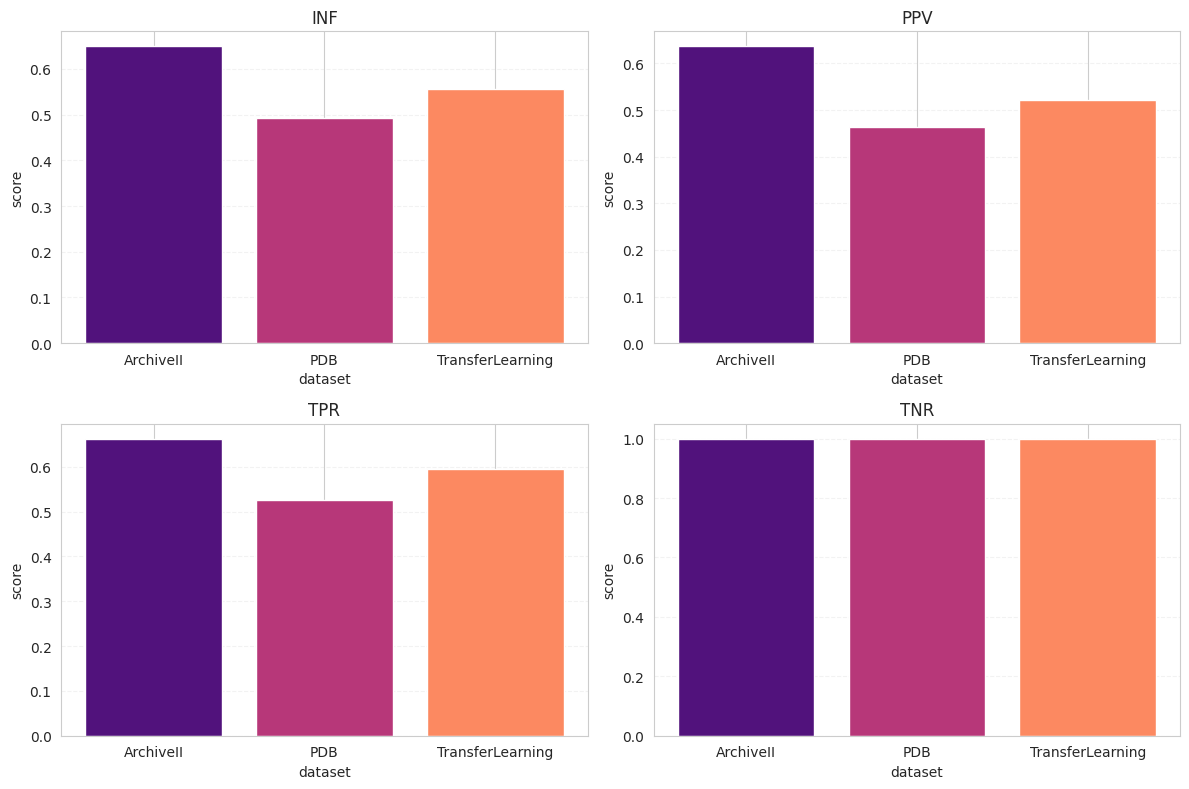

In [18]:
datasets = ("ArchiveII", "PDB", "TransferLearning")

plot_metrics(datasets)